In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,mean_squared_error

import xgboost as xgb

from joblib import dump, load
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting Display Max columns and display max rows to None so that it displays all the rows and columns which will 
# help us in initial analysis
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Importing the dataset
car_df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Checking some rows to get a basic understanding of the data
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Checking the dataframe size to understand what amount of data we are dealing with
car_df.shape

(205, 26)

In [6]:
# Checking the dataframe for the datatypes for all the columns
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Doing describe to check the spread of values across all numerical fields
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Checking the percentage of missing values across all the columns
(car_df[car_df.columns].isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Data cleaning

In [9]:
# Before cleaning just checking few rows to get better understanding of the data
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
# Checking whether any duplicate row is present with respect to car id
car_df['car_ID'].nunique()<205

False

In [11]:
# Dropping car id from car dataframe as it is not going to add value to our analysis
car_df = car_df.drop('car_ID',axis=1)

In [12]:
# Dropping car name from car dataframe as generally we know that car name always helps us in determing price
# but here we are loooking for car features hence dropping it
car_df = car_df.drop('CarName',axis=1)

In [13]:
# Dropped symboling variable as I have seen that without it model is performing better
car_df = car_df.drop('symboling',axis=1)

## Data Analysis

In [14]:
# Created a function to plot bar graph between independent variables and price (dependent variable)

def plotBarGraph(df,xLabel,yLabel,graphSize=[]):
    barData = df.plot(kind="bar",figsize=graphSize)
    barData.set_xlabel(xLabel)
    barData.set_ylabel(yLabel)

    for p in barData.patches:
        barData.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center')

In [15]:
# Performing univariate analysis on variables
# Checking distribution of values in "fueltype" feature
car_df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [16]:
# Checking distribution of values in "aspiration" feature
car_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [17]:
# Checking distribution of values in "carbody" feature
car_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [18]:
# Checking distribution of values in "drivewheel" feature
car_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [19]:
# Checking distribution of values in "enginelocation" feature
car_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [20]:
# Checking distribution of values in "enginetype" feature
car_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [21]:
# Checking distribution of values in "cylindernumber" feature
car_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [22]:
# Checking distribution of values in "fuelsystem" feature
car_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

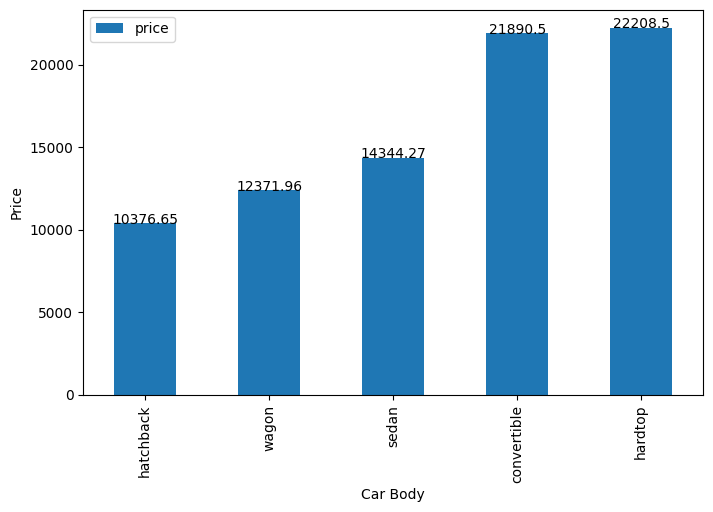

In [23]:
# Created a pivot table and then plotted a bar graph to check how the mean price varies across different car body categories
carbody_dist = pd.pivot_table(car_df,index='carbody',values='price',aggfunc='mean').sort_values(by='price',ascending=True)
plotBarGraph(carbody_dist, 'Car Body', 'Price',[8,5])

In [24]:
# Checking the number of unique engine size's in ascending order
np.array(sorted(car_df['enginesize'].unique()))

array([ 61,  70,  79,  80,  90,  91,  92,  97,  98, 103, 108, 109, 110,
       111, 119, 120, 121, 122, 130, 131, 132, 134, 136, 140, 141, 145,
       146, 151, 152, 156, 161, 164, 171, 173, 181, 183, 194, 203, 209,
       234, 258, 304, 308, 326], dtype=int64)

In [25]:
# Bucketing the engine size across ranges to convert it to a categorical variable
car_df['enginesize_bucket'] = pd.cut(car_df['enginesize'],[0,50,100,150,200,250,300,350],labels=['0-5','50-100','100-150','150-200','200-250','250-300','300-350'])

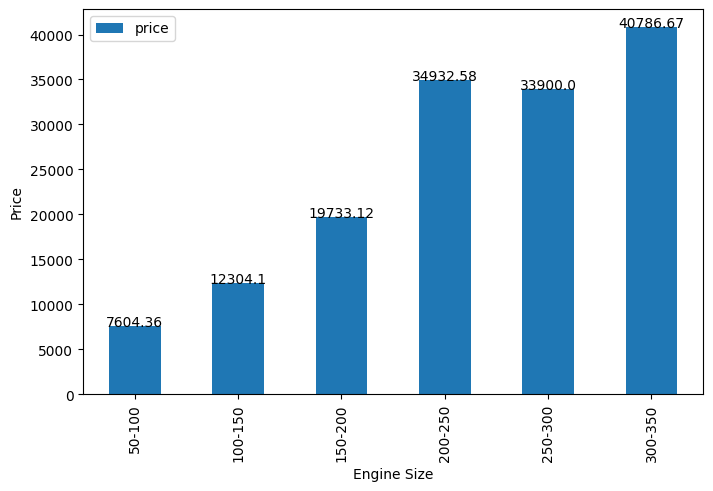

In [26]:
# Created a pivot table and then plotted a bar graph to check how the mean price varies across different engine size buckets
car_enginesize_dist = pd.pivot_table(car_df,index='enginesize_bucket',values='price',aggfunc='mean')
plotBarGraph(car_enginesize_dist, 'Engine Size', 'Price',[8,5])

In [27]:
# Created a model with engine size buckets but at last when try to understand the top 7-10 features which are importance in 
# terms of price prediction then found engine size of different buckets are present as a result we couldn't understand the 
# importance of other features much.
car_df = car_df.drop('enginesize_bucket', axis=1)

In [28]:
# Checking the number of unique peak rpm's in ascending order
np.array(sorted(car_df['peakrpm'].unique()))

array([4150, 4200, 4250, 4350, 4400, 4500, 4650, 4750, 4800, 4900, 5000,
       5100, 5200, 5250, 5300, 5400, 5500, 5600, 5750, 5800, 5900, 6000,
       6600], dtype=int64)

In [29]:
# Bucketing the peak rpm across ranges to convert it to a categorical variable
car_df['peakrpm_bucket'] = pd.cut(car_df['peakrpm'],[4000,4500,5000,5500,6000,6500,7000],labels=['4000-4500','4500-5000','5000-5500','5500-6000','6000-6500','6500-7000'])

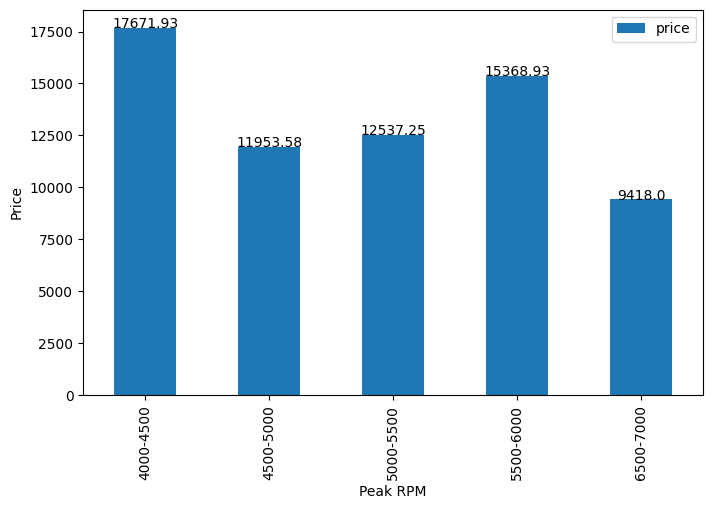

In [30]:
# Created a pivot table and then plotted a bar graph to check how the mean price varies across different peak rpm buckets
car_peakrpm_dist = pd.pivot_table(car_df,index='peakrpm_bucket',values='price',aggfunc='mean')
plotBarGraph(car_peakrpm_dist, 'Peak RPM', 'Price',[8,5])

In [31]:
# Created a model with peakrpm_bucket but found that with or without bucket it didn't create any significant difference.
car_df = car_df.drop('peakrpm_bucket', axis=1)

In [32]:
# Collating all numeric features under one list
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
car_num_cols = list(car_df.select_dtypes(include=numerics).columns)
car_num_cols

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [33]:
# car_categorical = car_df.select_dtypes(include=['object'])
# car_categorical.head()

In [34]:
# Collating all categorical features under one list
car_cat_cols = list(car_df.select_dtypes(exclude=numerics).columns)
car_cat_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [35]:
# Checking the correlation amoung the numerical variables in the dataset
car_corr = car_df[car_num_cols].corr()
car_corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


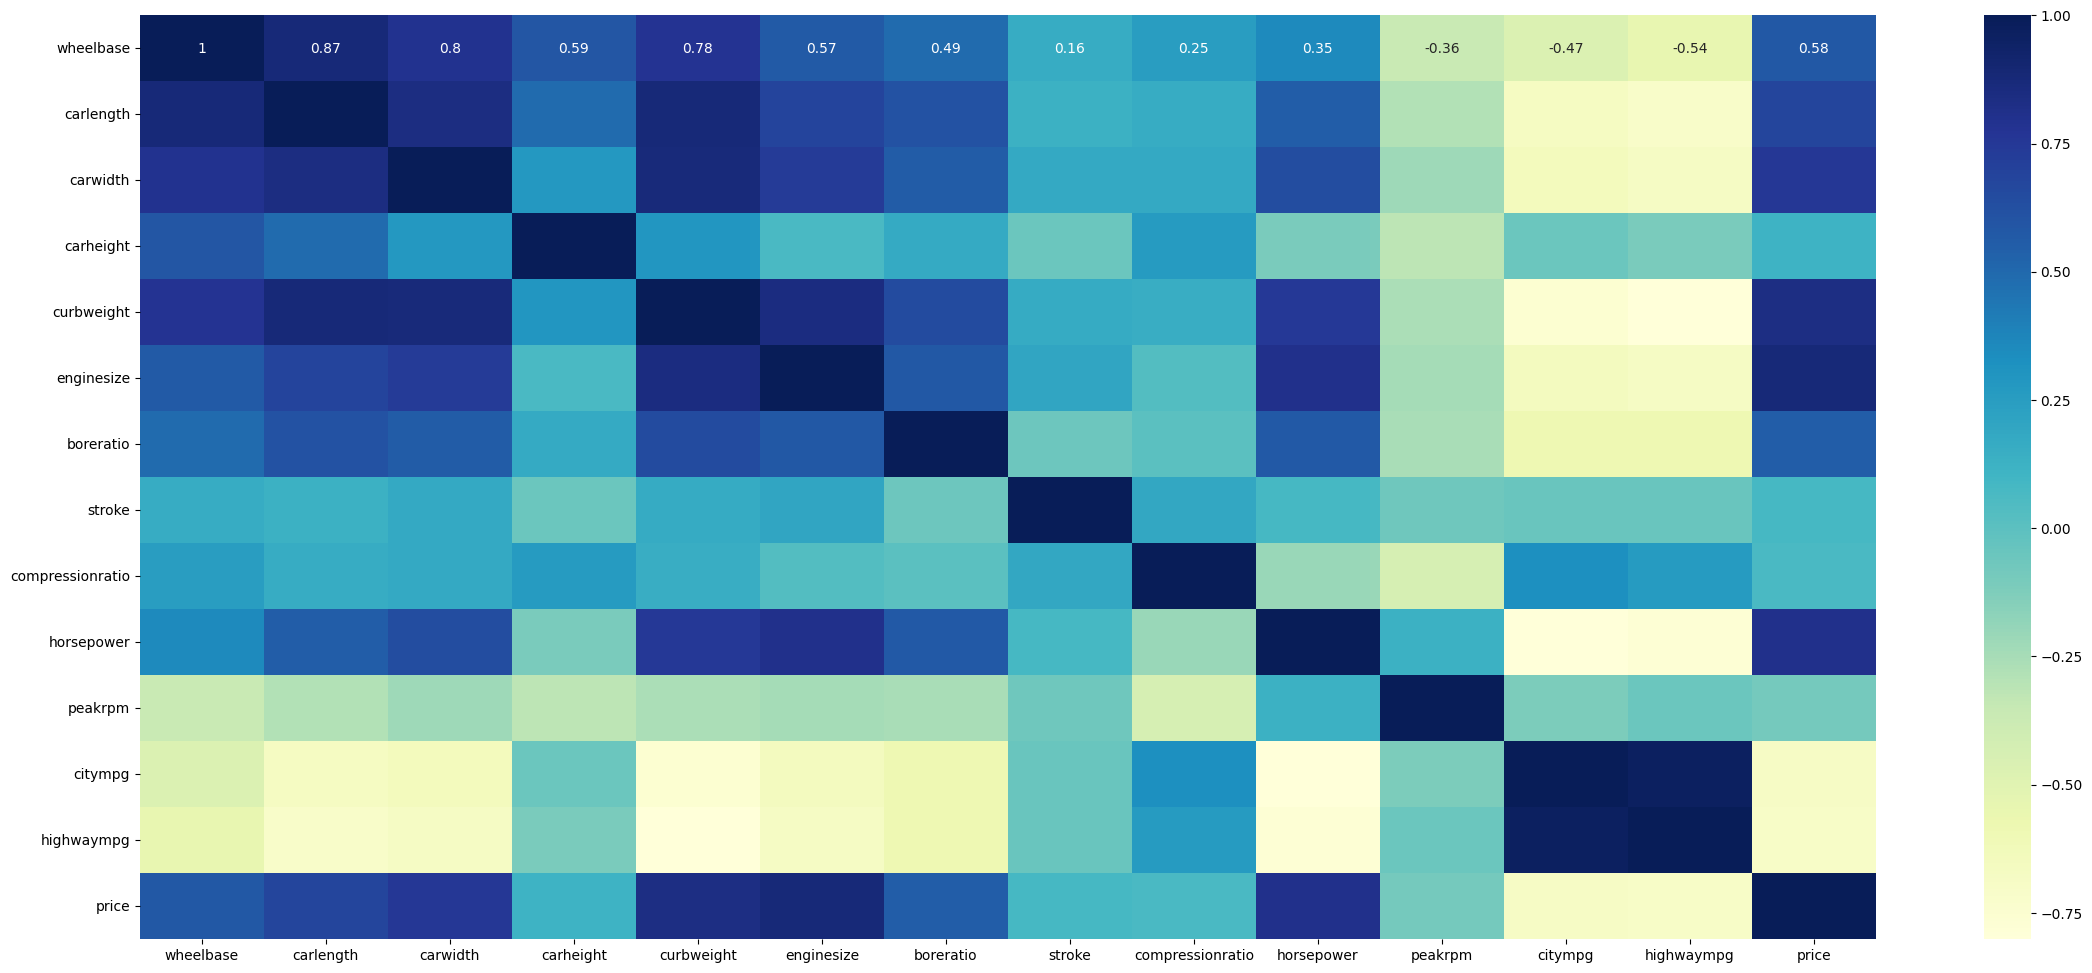

In [36]:
# Plotting the correlation among numerical variables on a heat map
plt.figure(figsize=(28,12))

# plotting heatmap
sns.heatmap(car_corr, cmap="YlGnBu", annot=True)
plt.show()

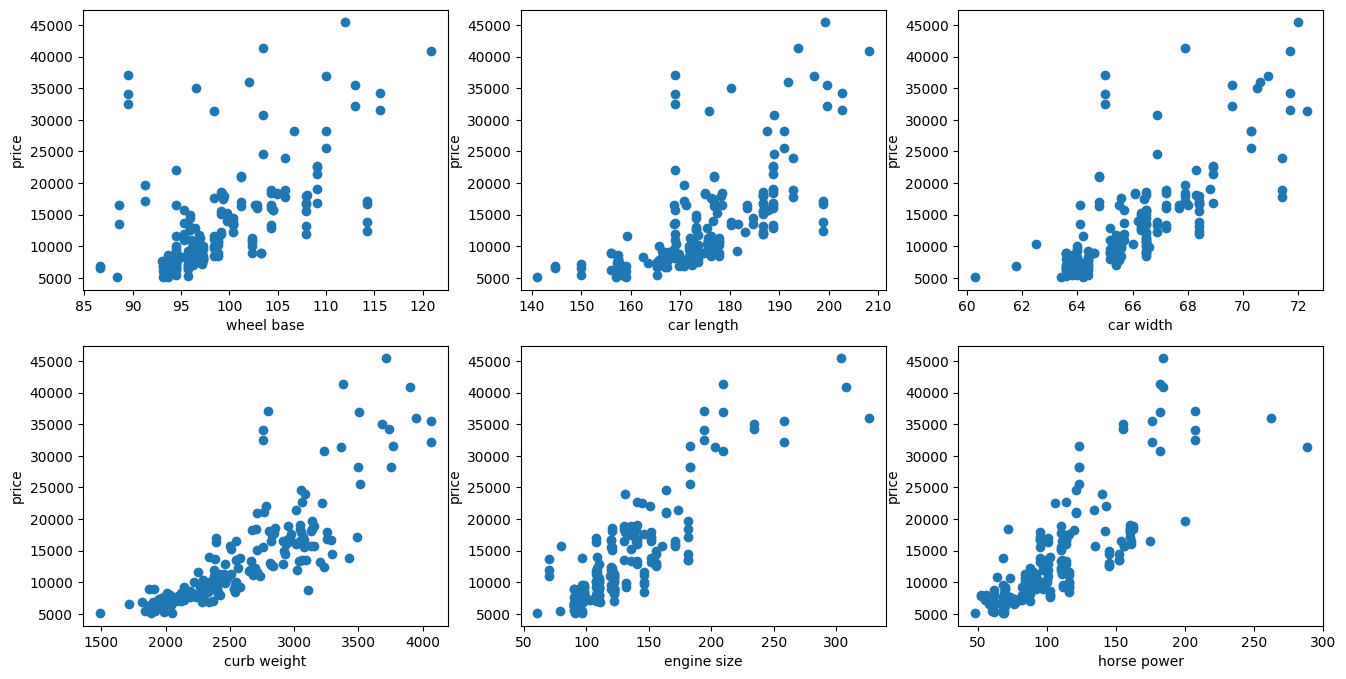

In [37]:
# Doing the scatter plot for some of the variables which are highly correlated with the target variable

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.xlabel("wheel base")
plt.ylabel("price")
plt.scatter(car_df['wheelbase'],car_df['price'])

plt.subplot(2,3,2)
plt.xlabel("car length")
plt.ylabel("price")
plt.scatter(car_df['carlength'],car_df['price'])

plt.subplot(2,3,3)
plt.xlabel("car width")
plt.ylabel("price")
plt.scatter(car_df['carwidth'],car_df['price'])

plt.subplot(2,3,4)
plt.xlabel("curb weight")
plt.ylabel("price")
plt.scatter(car_df['curbweight'],car_df['price'])

plt.subplot(2,3,5)
plt.xlabel("engine size")
plt.ylabel("price")
plt.scatter(car_df['enginesize'],car_df['price'])

plt.subplot(2,3,6)
plt.xlabel("horse power")
plt.ylabel("price")
plt.scatter(car_df['horsepower'],car_df['price'])

<Axes: xlabel='price', ylabel='Density'>

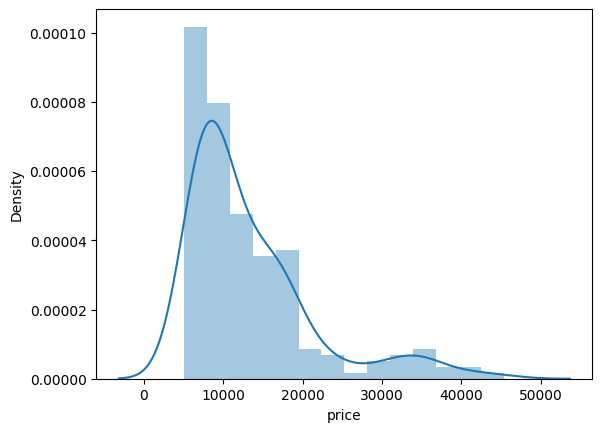

In [38]:
# Checking the distribution of price data
sns.distplot(car_df.price)

<Axes: title={'center': 'Car horsepower plot'}, xlabel='horsepower', ylabel='Density'>

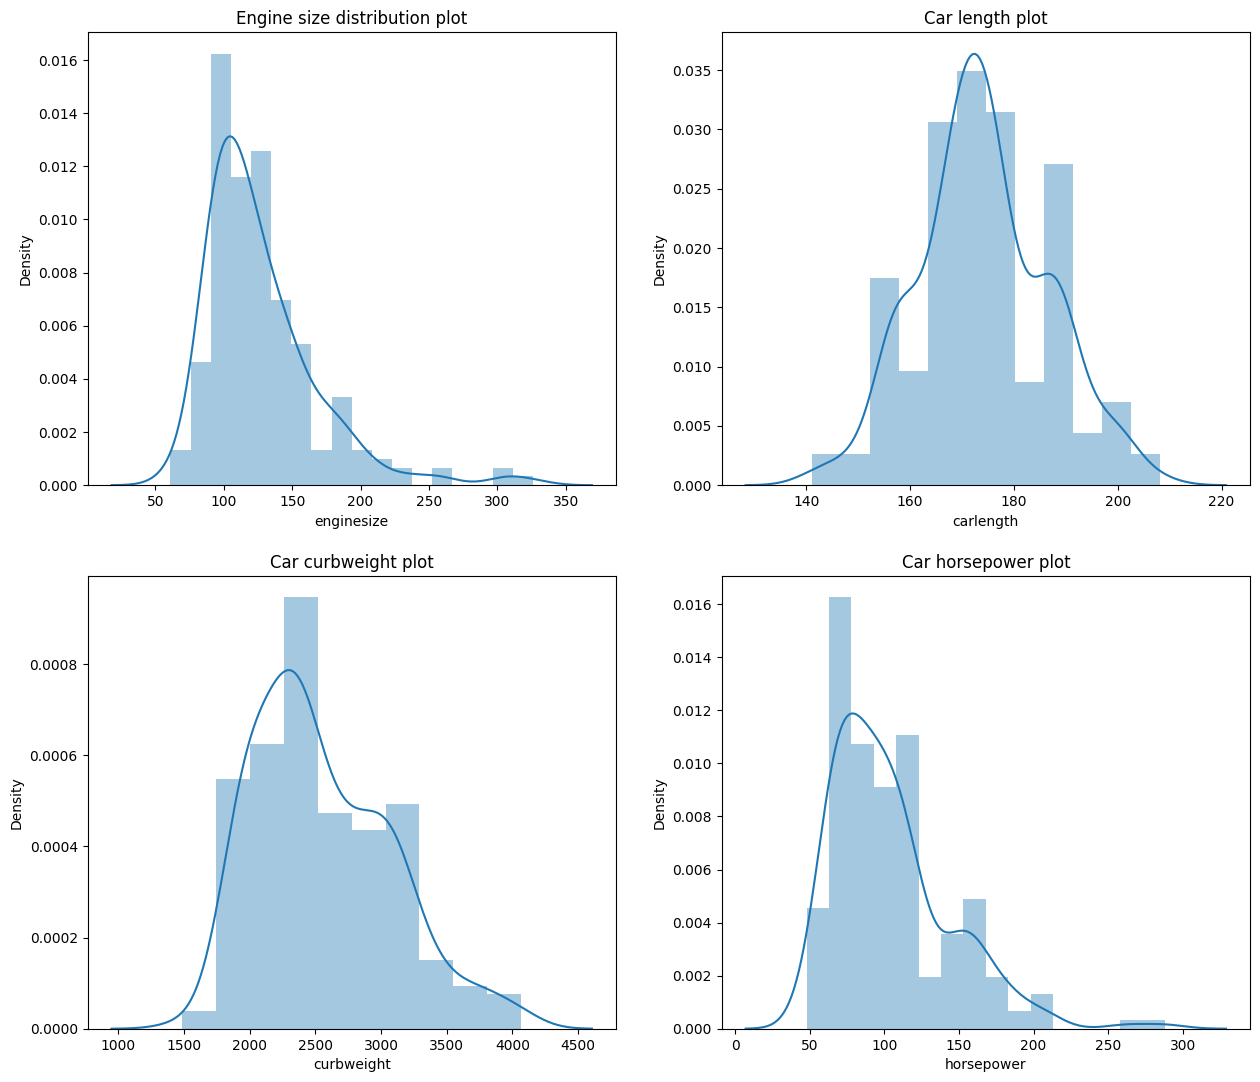

In [39]:
# Checking the data distribution across multiple variables

fig = plt.figure(figsize=(15,20),edgecolor='b')

plt.subplot(3,2,1)
plt.title('Engine size distribution plot')
sns.distplot(car_df.enginesize) 

plt.subplot(3,2,2)
plt.title('Car length plot')
sns.distplot(car_df.carlength) 

plt.subplot(3,2,3)
plt.title('Car curbweight plot')
sns.distplot(car_df.curbweight) 

plt.subplot(3,2,4)
plt.title('Car horsepower plot')
sns.distplot(car_df.horsepower) 

## Data preparation

In [40]:
# # Creating dummy variables inorder to convert categorical variables to numeric
# car_dummies = pd.get_dummies(car_df[car_cat_cols], drop_first=True)
# car_dummies.head()

In [41]:
# Performing one hot encoding inorder to convert categorical variables to numeric
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
ohe.fit(car_df[car_cat_cols])
car_ohe = ohe.transform(car_df[car_cat_cols])
car_df_ohe = pd.DataFrame(car_ohe, columns = ohe.get_feature_names_out(input_features = car_cat_cols))
car_df_ohe.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
#Dumping/Storing the one hot encoding object into a file for later use
dump(ohe, 'models/ohe.joblib')

['models/ohe.joblib']

In [43]:
# Dropping all the original categorical variables as we already created dummies for each
car_df = car_df.drop(list(car_cat_cols), axis=1)

In [44]:
# Concatting all the dummy variables with the original dataframe
car_df = pd.concat([car_df, car_df_ohe], axis=1)

In [45]:
# Checking the final dataframe shape
car_df.shape

(205, 52)

In [46]:
# Printing couple of rows to check whether the joining worked
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
# Dividing the entire data into X and y that is all independent feature into X and dependent feature to y
X=car_df
y=car_df.pop('price')

In [48]:
# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [49]:
# splitting the test set into further test and validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,train_size=0.5,random_state=42)

In [50]:
# Performed scaling using StandardScaler on all numeric variables except price that is the target feature
car_num_cols.remove('price')
scaler=StandardScaler()
scaler.fit(X_train[car_num_cols])

X_train[car_num_cols] = scaler.transform(X_train[car_num_cols])
X_test[car_num_cols] = scaler.transform(X_test[car_num_cols])

In [51]:
#Dumping/Storing the scaler object into a file for later use
dump(scaler, 'models/scaler.joblib')

['models/scaler.joblib']

## Model building

In [52]:
# Creating an XGBRegression object with default paramters
xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [53]:
# Fitting the XGBRegression model on the train dataset
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred_test = xgb_reg.predict(X_test)

r2score = round(r2_score(y_pred_test,y_test),2)*100

In [55]:
print("R2 Score on Test Data is : ",r2score)

R2 Score on Test Data is :  95.0


In [56]:
mse = mean_squared_error(y_test, y_pred_test)

rmse = round(math.sqrt(mse),2)

print(rmse)

1644.33


In [57]:
dump(xgb_reg, 'models/XGBoost.joblib')

['models/XGBoost.joblib']

## Prediction and Model evaluation

In [59]:
# Calculating R2 score

y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 score on Training data : ",round(r2_train_lr,2)*100)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 score on Test data : ",round(r2_test_lr,2)*100)

R2 score on Training data :  100.0
R2 score on Test data :  94.0


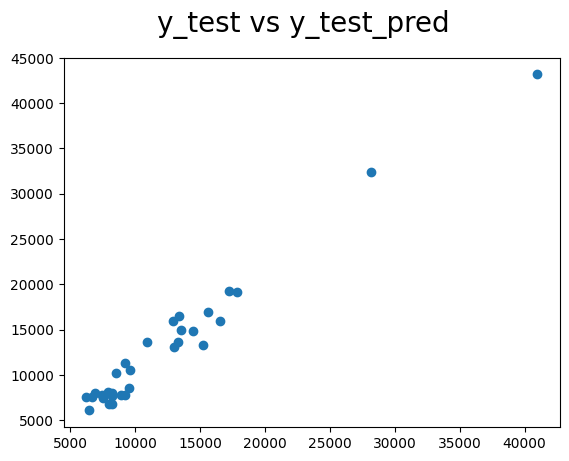

In [60]:
# Plotting a scatter plot of the actual and predicted values of the test set
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.scatter(y_test,y_test_pred)

In [62]:
# Creating a dataframe containing the features names and its corresponding coefficient values
linear_model_parameter = list(abs(xgb_reg.feature_importances_))
cols = X_train.columns
lm_model_df = pd.DataFrame(list(zip(cols,linear_model_parameter)))
lm_model_df.columns = ['Feaure','Coef']

In [63]:
# Only selecting the features whose coeficient values are greater than 0
lm_model_df = lm_model_df[lm_model_df['Coef']>0]

In [64]:
# Sorted the created dataframe containing the features names and its corresponding coefficient values in descending order 
# inorder to get the top coefficients
lm_model_df.sort_values(by='Coef',ascending=False).reset_index(drop=True)

,Feaure,Coef
0,enginesize,6.107703e-01
1,highwaympg,2.407008e-01
2,enginetype_ohc,4.477252e-02
3,enginetype_ohcv,2.250381e-02
4,carlength,1.550719e-02
5,horsepower,1.466382e-02
6,curbweight,7.710965e-03
7,aspiration_std,6.091724e-03
8,stroke,5.183958e-03
9,carbody_convertible,4.836797e-03
